In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1dX1O6K84ZfNJMNbVlhRNpHrWwBAugRhe'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('diabetes_data.csv')

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.decomposition import PCA 
from psynlig import pca_explained_variance_bar
plt.style.use('seaborn-talk')

<ipython-input-63-5879022a7f7a>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [ ]:
df = pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head())
print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape) 

HEAD of df
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

TAIL of df
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23 

### Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Missing Values
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age    

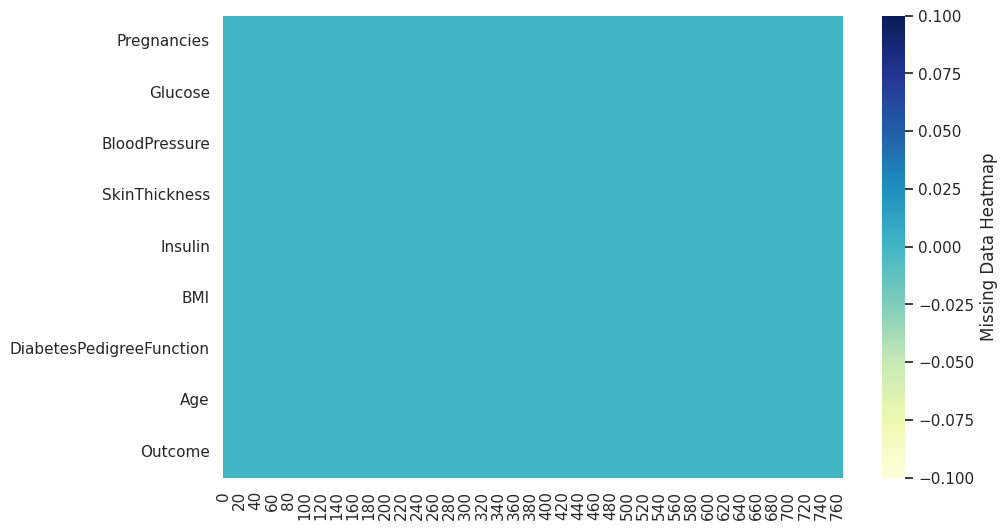

In [ ]:
# Checks
# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()

## Duplicate


In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


## Descriptive Analysis

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                           count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure      

CORRELATION MATRIX
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

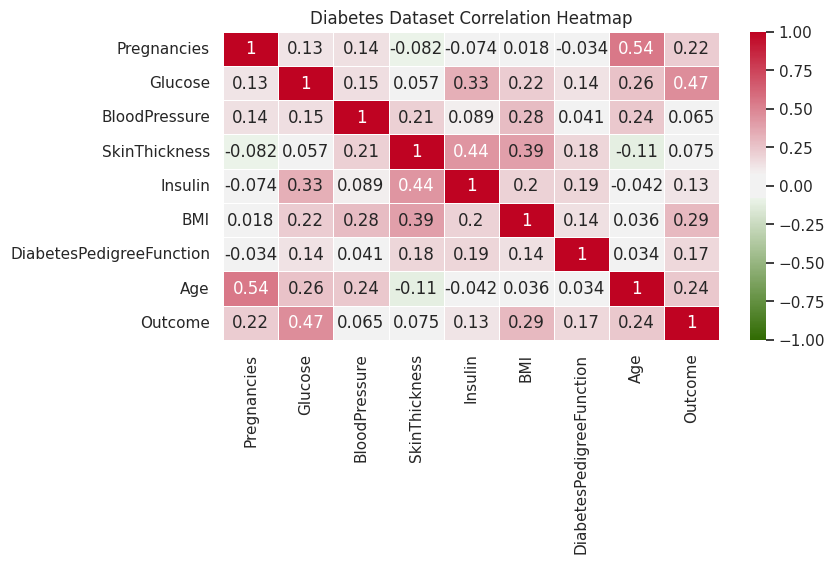



COVARIANCE MATRIX
                           Pregnancies      Glucose  BloodPressure  \
Pregnancies                 11.354056    13.947131       9.214538   
Glucose                     13.947131  1022.248314      94.430956   
BloodPressure                9.214538    94.430956     374.647271   
SkinThickness               -4.390041    29.239183      64.029396   
Insulin                    -28.555231  1220.935799     198.378412   
BMI                          0.469774    55.726987      43.004695   
DiabetesPedigreeFunction    -0.037426     1.454875       0.264638   
Age                         21.570620    99.082805      54.523453   
Outcome                      0.356618     7.115079       0.600697   

                          SkinThickness       Insulin         BMI  \
Pregnancies                   -4.390041    -28.555231    0.469774   
Glucose                       29.239183   1220.935799   55.726987   
BloodPressure                 64.029396    198.378412   43.004695   
SkinThicknes

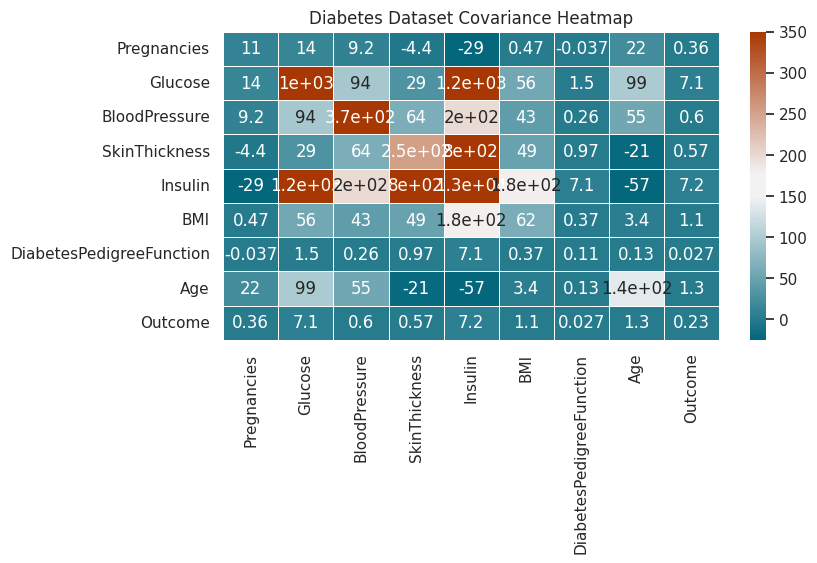

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (8,4))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Diabetes Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (8,4))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -25, vmax = 350, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Diabetes Dataset Covariance Heatmap")
plt.show()

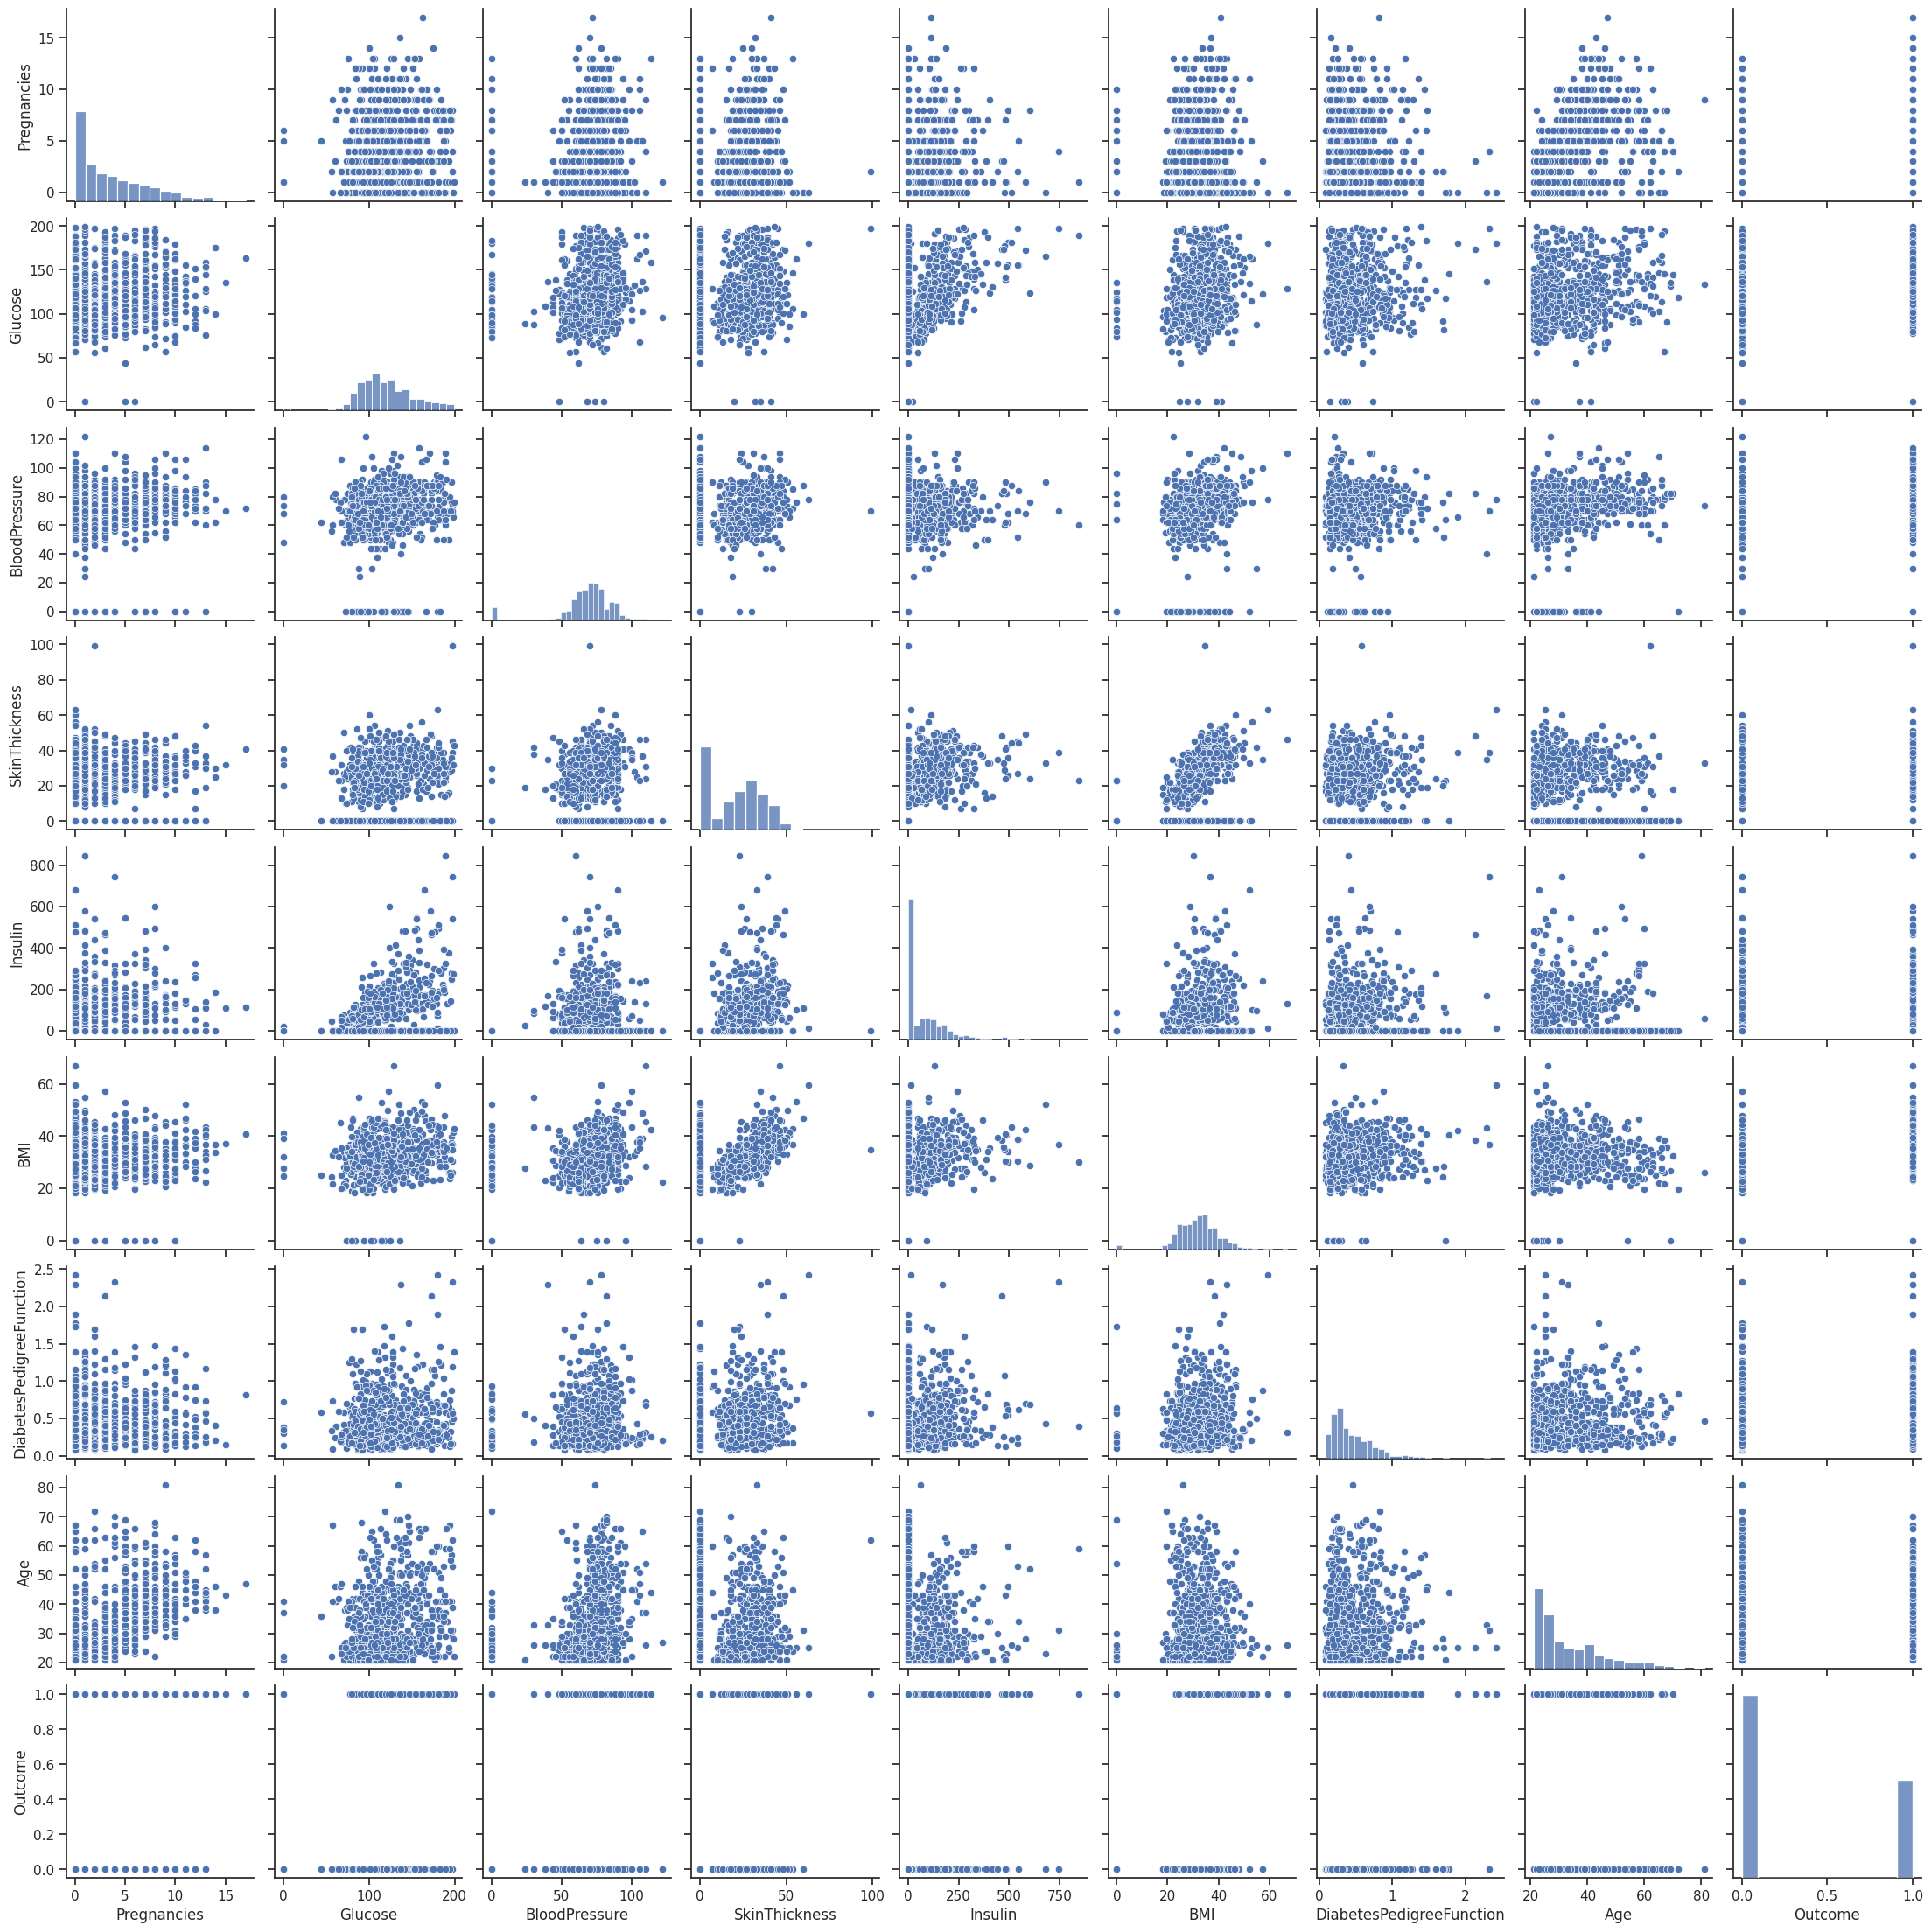

In [ ]:
# Bivariate Graphical Descriptive Statistics
#Scatterplot matrix - these can take some time to gerenerate if the number of featires is large
sns.set_theme(style="ticks")
sns.pairplot(df)

# Preprocessing


##Skewness Correction

In [ ]:
def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 'BloodPressure' had 'negative' skewness of -1.84

 Transformation yielded skewness of -1.32


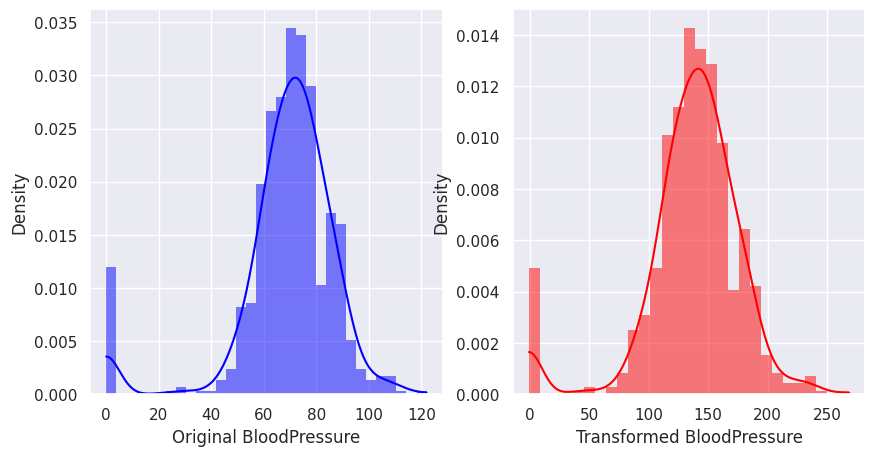


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'BMI' . Skewness = -0.43


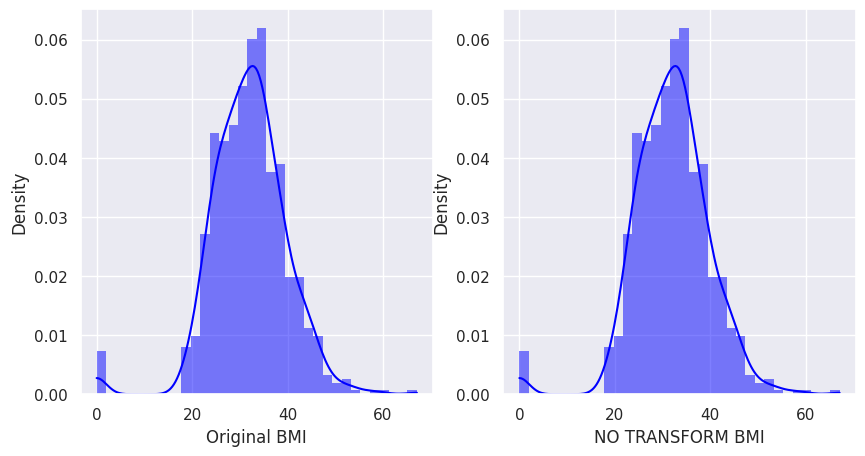

In [ ]:
X = skew_autotransform(df.copy(deep=True), include=['BloodPressure','BMI'],plot = True, exp = False, threshold = 1)

## Outliers

Column  Pregnancies :  [28, 72, 86, 88, 159, 274, 298, 323, 357, 455, 518, 635, 691, 744]
Column  Glucose :  [75, 182, 342, 349, 502]
Column  BloodPressure :  [7, 15, 18, 43, 49, 60, 78, 81, 84, 106, 125, 172, 177, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604, 619, 643, 691, 697, 703, 706]
Column  SkinThickness :  [579]
Column  Insulin :  [8, 13, 53, 54, 56, 111, 139, 153, 162, 186, 199, 220, 228, 231, 247, 248, 258, 286, 296, 360, 364, 370, 375, 388, 392, 409, 412, 415, 480, 486, 519, 574, 584, 606, 612, 645, 655, 695, 707, 710, 713, 715, 753]
Column  BMI :  [9, 49, 60, 81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445, 494, 522, 673, 684, 706]
Column  DiabetesPedigreeFunction :  [4, 12, 39, 45, 58, 100, 147, 152, 187, 218, 228, 243, 245, 259, 292, 308, 330, 370, 371, 383, 395, 408, 434, 445, 487, 493, 534, 588, 593, 606, 618, 621, 622, 657, 659, 661, 744, 750]
Column  Age :  [123, 148, 221, 263, 29

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

After        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.742188  121.343750     138.866936      20.239583   72.462240   
std       3.123898   28.989079      30.482725      15.316305   90.568989   
min       0.000000   79.000000      65.395658       0.000000    0.000000   
25%       1.000000   99.000000     118.530823       0.000000    0.000000   
50%       3.000000  117.000000     142.062904      23.000000   30.500000   
75%       6.000000  140.250000     161.379215      32.000000  127.250000   
max      10.000000  181.000000     186.080462      44.000000  293.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.163932                  0.457349   32.951823    0.348958  
std      6.361948                  0.277178   11.006885    0.476951  
min     21.800000            

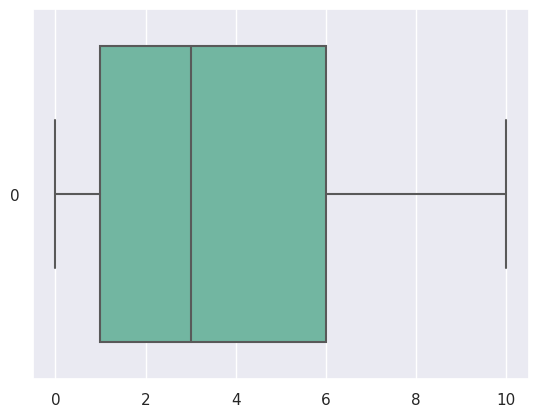

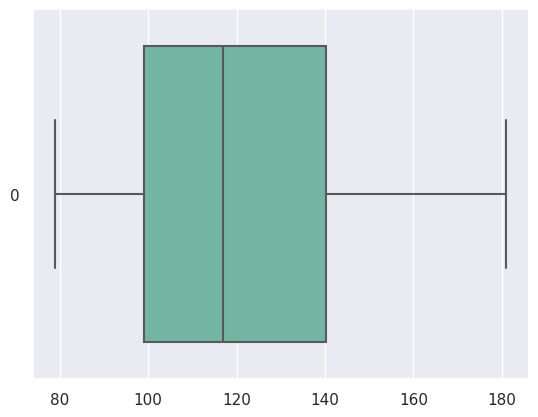

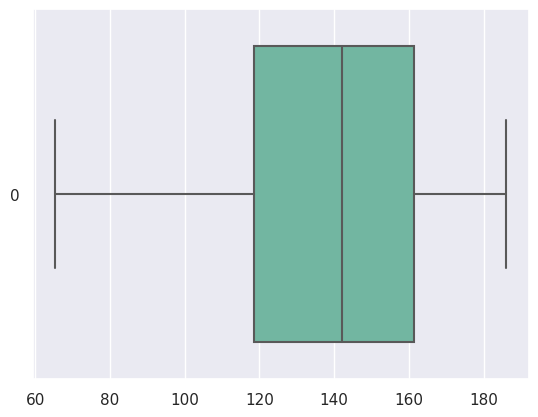

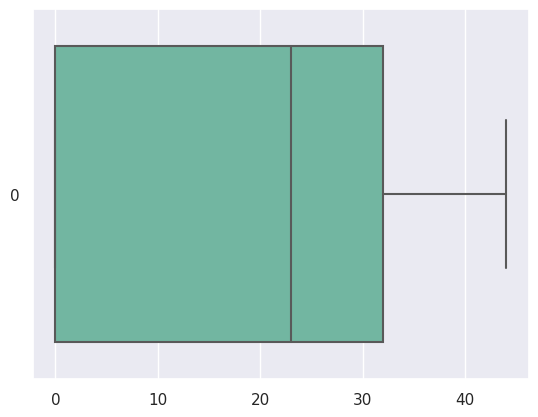

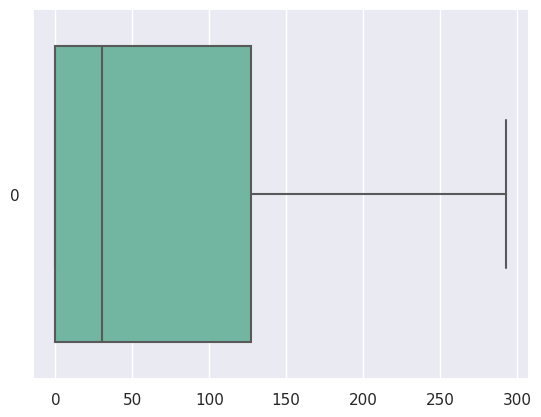

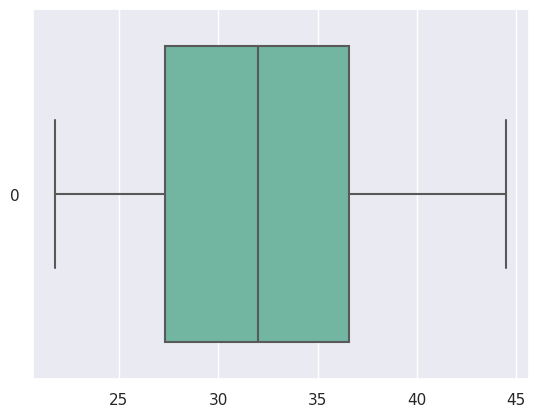

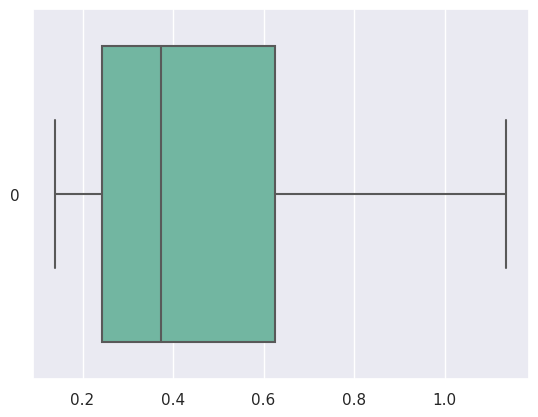

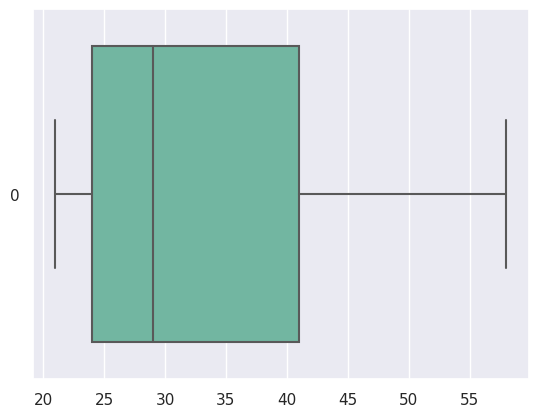

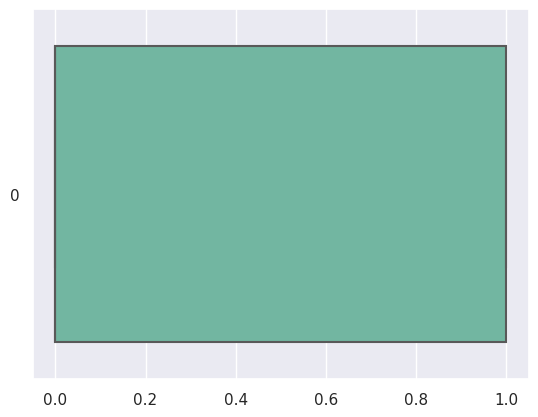

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())
for i in cols:
  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")
  plt.show()

### Principal Components Analysis

In [ ]:
# Split features into X1 (quant features), X2 (qual features) and y (target)
# Identify predictors & target
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
X_std = stdsc.fit_transform(X)

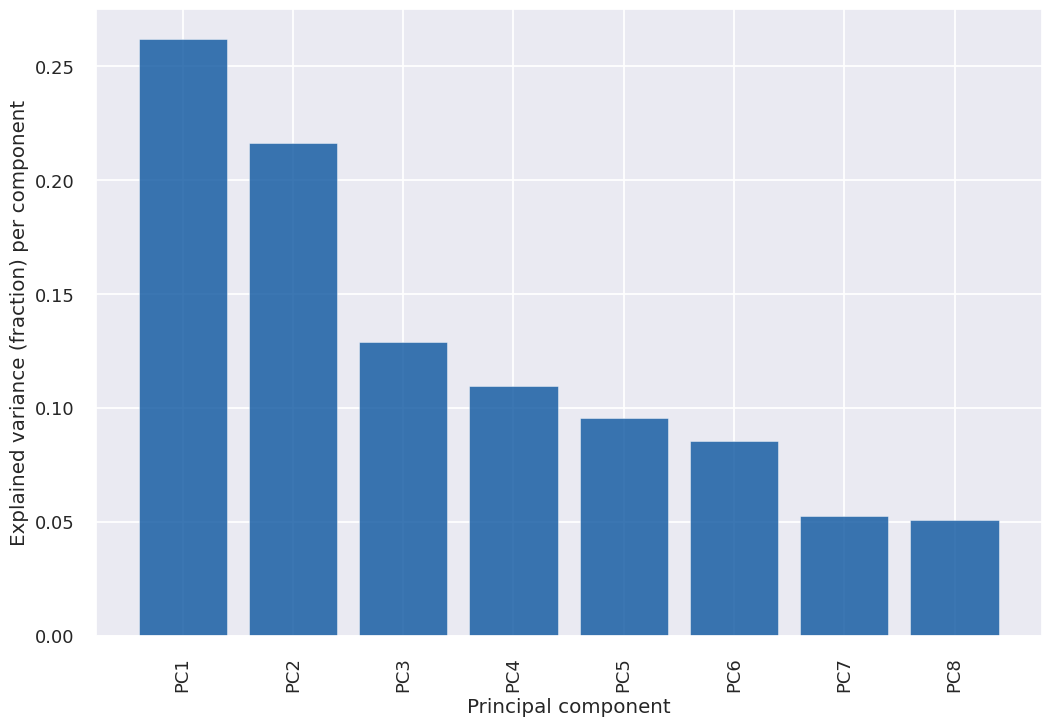

In [ ]:
# Principal Components Analysis
# Examine the explained variance ratio in order for each components
pca = PCA()
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

# Classification


### Recursive Feature Elimination (RFE)

In [ ]:
# Split features into X1 (quant features), X2 (qual features) and y (target)
# Identify predictors & target
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54321, stratify=y)

In [ ]:
# SMOTE (oversampling)
# Data is unbalanced (38.54% converted instances)

import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12346)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print("Shape before SMOTE: ", X_train.shape, y_train.shape, "\n")
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape, "\n")

imblearn version:  0.10.1
Shape before SMOTE:  (576, 8) (576,) 

Shape after SMOTE:  (750, 8) (750,) 



In [ ]:
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
X_test_std = stdsc.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2)    #Selecting the top n features, from about 70, to improve model robustness.
_ = rfe.fit(X_train_SMOTE_std,y_train_SMOTE)
print('Important Features\n',X.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X_train_SMOTE_std), y_train_SMOTE)
print("\n Accuracy: ",rf.score(rfe.transform(X_test_std), y_test))

Important Features
 Index(['Glucose', 'BMI'], dtype='object')

 Accuracy:  0.7239583333333334


<BarContainer object of 8 artists>

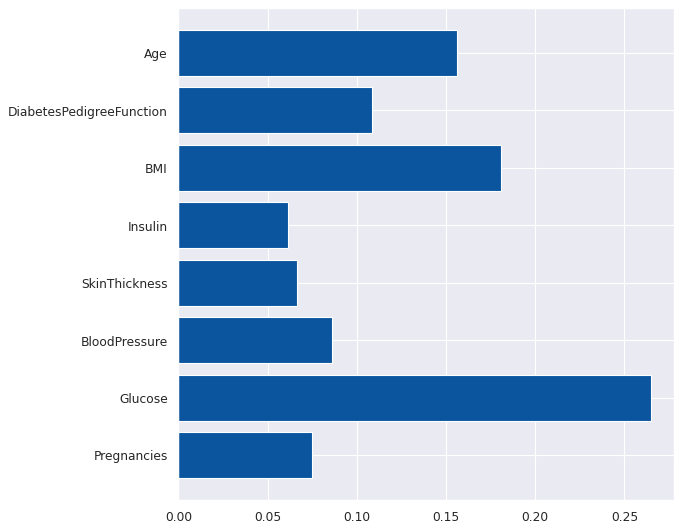

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.inspection import permutation_importance
rf = RandomForestClassifier()
from matplotlib.pyplot import figure
col_names = X_train_SMOTE.columns
rf.fit(X_train_SMOTE_std, y_train_SMOTE)
figure(figsize=(8, 8), dpi=80)
plt.barh(col_names, rf.feature_importances_)

## Cross Validation


In [ ]:
# Add cross-validation
weights = {0:0.2, 1:0.8} # The weights are supposed to penalize errors in the classes. So, if we think false positives are 4 times "worse" than false negatives
                         # we should set the weights to be {0:0.2, 1:0.8}. But the implementation in sklearn appears to be backwards, so experiment with this  
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression(random_state=1,solver='sag',class_weight=weights))

scores = cross_val_score(pipe_lr, X, y, cv=5, n_jobs = -1,scoring='roc_auc')
print('CV AUC scores: {}'.format(scores))
print('CV AUC mean: {} and std deviation: {}'.format(np.mean(scores), np.std(scores)))

scores = cross_val_score(pipe_lr, X, y, cv=5, n_jobs = -1,scoring='recall')
print('CV recall scores: {}'.format(scores))
print('CV recall mean: {} and std deviation: {}'.format(np.mean(scores), np.std(scores)))

scores = cross_val_score(pipe_lr, X, y, cv=5, n_jobs = -1)
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean: {} and std deviation: {}'.format(np.mean(scores), np.std(scores)))

CV AUC scores: [0.80222222 0.77944444 0.77537037 0.83377358 0.80811321]
CV AUC mean: 0.7997847658979734 and std deviation: 0.021167594747562236
CV recall scores: [0.83333333 0.92592593 0.87037037 0.9245283  0.94339623]
CV recall mean: 0.8995108315863034 and std deviation: 0.041178117157988255
CV accuracy scores: [0.65584416 0.61688312 0.61688312 0.71895425 0.61437908]
CV accuracy mean: 0.6445887445887447 and std deviation: 0.04026099745943553


## Other classfiers

In [ ]:
# Workflow standardizes, SMOTEs training set, fits a classifier, and reports metrics.
# SMOTE evidently doesn't have a 'fit_transform' method, so there's no way to incorporate it into an sklearn pipeline
# We'll consider an alternative - an imblearn pipeline in the gridsearch section

names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "Naive Bayes", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]
classifiers = [
    Perceptron(random_state=1),    
    LogisticRegression(),   
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data 
no_folds = 5 # number of folds desired for cross validation
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)
for name, clf in zip(names, classifiers):
  print('CLASSIFIER: ',name,'\n')
  mean_accuracy = 0.0
  mean_balanced_accuracy = 0.0
  mean_auc = 0.0
  for fold, (train_index, test_index) in enumerate(kf.split(X,y),1):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)] 
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
    stdsc = StandardScaler()  
    X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)   
    X_test_std = stdsc.transform(X_test)   
    clf.fit(X_train_SMOTE_std, y_train_SMOTE) 
    y_pred = clf.predict(X_test_std)
    print(f'For fold {fold}:')
    print(f'Accuracy: {clf.score(X_test_std, y_test)}')
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    mean_accuracy = mean_accuracy + clf.score(X_test_std, y_test)
    mean_balanced_accuracy = mean_balanced_accuracy + balanced_accuracy_score(y_test, y_pred)
    mean_auc = mean_auc + roc_auc_score(y_test, y_pred)
  mean_accuracy = mean_accuracy / no_folds
  mean_balanced_accuracy = mean_balanced_accuracy / no_folds
  mean_auc = mean_auc / no_folds
  print('Average accuracy: %.3f Average balanced accuracy: %.3f Average AUC: %.3f\n\n' % (mean_accuracy, mean_balanced_accuracy, mean_auc))

CLASSIFIER:  Perceptron 

For fold 1:
Accuracy: 0.6818181818181818
Balanced Accuracy: 0.6953703703703704
AUC: 0.6953703703703704
For fold 2:
Accuracy: 0.6818181818181818
Balanced Accuracy: 0.720925925925926
AUC: 0.720925925925926
For fold 3:
Accuracy: 0.7207792207792207
Balanced Accuracy: 0.6870370370370371
AUC: 0.6870370370370371
For fold 4:
Accuracy: 0.6339869281045751
Balanced Accuracy: 0.6224528301886793
AUC: 0.6224528301886791
For fold 5:
Accuracy: 0.7189542483660131
Balanced Accuracy: 0.7051886792452831
AUC: 0.7051886792452831
Average accuracy: 0.687 Average balanced accuracy: 0.686 Average AUC: 0.686


CLASSIFIER:  Logistic Regression 

For fold 1:
Accuracy: 0.7922077922077922
Balanced Accuracy: 0.7931481481481482
AUC: 0.7931481481481482
For fold 2:
Accuracy: 0.7597402597402597
Balanced Accuracy: 0.7638888888888888
AUC: 0.7638888888888888
For fold 3:
Accuracy: 0.7987012987012987
Balanced Accuracy: 0.7981481481481482
AUC: 0.7981481481481482
For fold 4:
Accuracy: 0.686274509803921

In [ ]:
# Try other classifiers

names = ["Decision Tree", "k Nearest Neighbors", "SVM", "MLP", "Random Forest", "XGBoost", "Light GBM"]
classifiers = [ 
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    SVC(),
    MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

for name, clf in zip(names, classifiers):
  pipe_many = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        clf)
  scores = cross_val_score(estimator=pipe_many,
                             X=X_train,
                             y=np.ravel(y_train),
                             cv=10,     #Reduced to three folds for execution speed
                             n_jobs=1,
                            scoring='roc_auc')
  print("Classifier: ",name)
  print('CV AUC scores: {}'.format(scores))
  print('CV AUC mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))
  print("\n\n")

Classifier:  Decision Tree
CV AUC scores: [0.70681818 0.65170455 0.73806818 0.69261364 0.71534091 0.86666667
 0.72857143 0.77321429 0.66428571 0.71130952]
CV AUC mean:0.7248593073593074 and std:0.0577027093900987



Classifier:  k Nearest Neighbors
CV AUC scores: [0.67613636 0.69886364 0.65909091 0.79715909 0.68181818 0.7452381
 0.70952381 0.83154762 0.63392857 0.73630952]
CV AUC mean:0.7169615800865801 and std:0.05853512887883581



Classifier:  SVM
CV AUC scores: [0.68409091 0.80340909 0.76931818 0.78409091 0.74772727 0.83690476
 0.80357143 0.90952381 0.76190476 0.84404762]
CV AUC mean:0.7944588744588745 and std:0.05816186981673707



Classifier:  MLP
CV AUC scores: [0.70113636 0.77613636 0.80909091 0.76931818 0.72954545 0.85357143
 0.78690476 0.91904762 0.79285714 0.83452381]
CV AUC mean:0.7972132034632035 and std:0.058915467926064474





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier:  Random Forest
CV AUC scores: [0.67613636 0.77954545 0.80227273 0.70454545 0.81477273 0.875
 0.73809524 0.88690476 0.81666667 0.82738095]
CV AUC mean:0.7921320346320346 and std:0.06520248506015627



Classifier:  XGBoost
CV AUC scores: [0.69545455 0.7625     0.8375     0.77272727 0.73636364 0.83333333
 0.72857143 0.86309524 0.76785714 0.83333333]
CV AUC mean:0.783073593073593 and std:0.05292357069929641



[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current 

# Regression

In [ ]:
X = pd.DataFrame(df.drop(['Outcome'],axis=1))
y = pd.DataFrame(df['Outcome']) 
y.columns = ['Outcome']

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape) 

Shape of X and y (768, 8) (768, 1) 
Shape of training set X and y (614, 8) (614, 1) 
Shape of test set X and y (154, 8) (154, 1)


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

### Feature Importance

<ipython-input-75-38bfa5495880>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_std, y_train_std)                  # Fit the RandomForest instance using the traiing data


<BarContainer object of 8 artists>

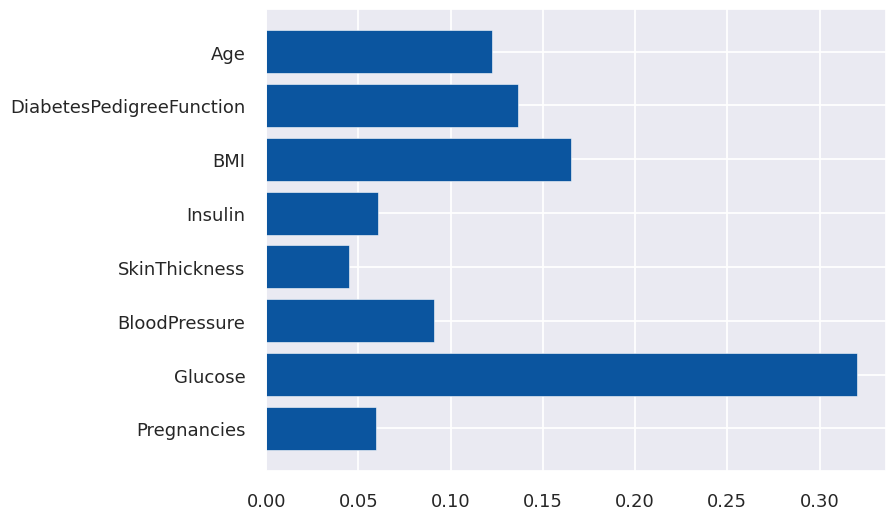

In [ ]:
# Feature Importance
# Code adapted from this source: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Let's try to weed out the really poor predictors
from matplotlib import pyplot                            # Import pyplot (to be able generate the barchart later in this snippet)
plt.rcParams["figure.figsize"] = (8,6)
model = RandomForestRegressor()                         # Create an instance of a RandomForestClassifier
# fit the model
model.fit(X_train_std, y_train_std)                  # Fit the RandomForest instance using the traiing data
# get importance 
importance = model.feature_importances_                  # The RandomForestClassifier instance computes feature importance as a bonus. Store them imprtance values in importance'.
# summarize feature importance
plt.barh(col_names, model.feature_importances_)   

### Base Learner Regressors

In [ ]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions)) 
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions 
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

REGRESSOR:  Multiple Linear Regression 

Coefficients: 
 [ 0.11221306  0.38755647 -0.10120347  0.02467629 -0.05619607  0.2248125
  0.09876743  0.08924083]
MSE: 0.14 
MAE: 0.32 
R^2: 0.32


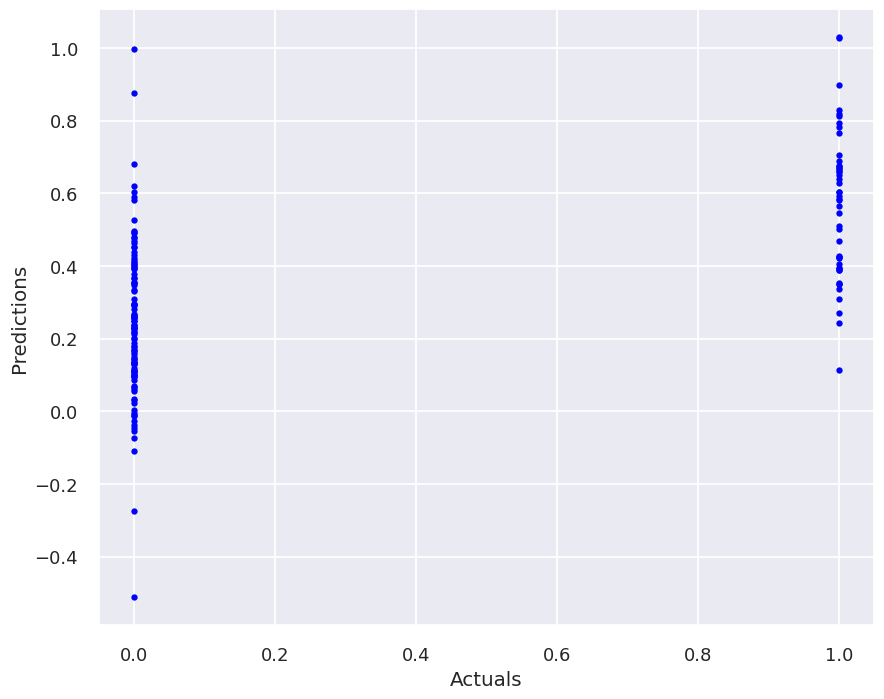

Maximum error:  inf %


REGRESSOR:  Lasso Regression 

Coefficients: 
 [0. 0. 0. 0. 0. 0. 0. 0.]
MSE: 0.22 
MAE: 0.45 
R^2: -0.01


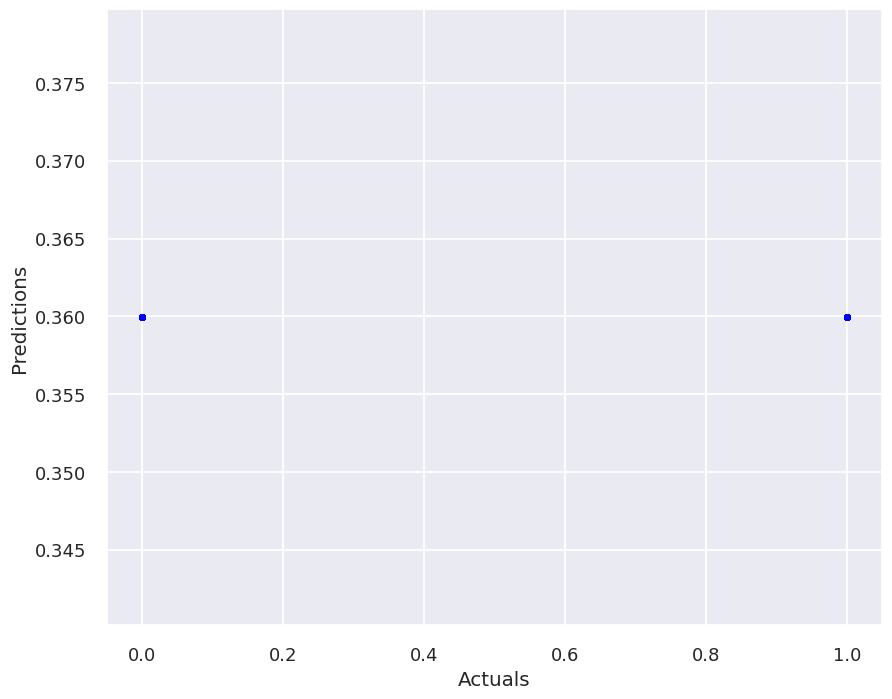

Maximum error:  inf %


REGRESSOR:  Ridge Regression 

Coefficients: 
 [ 0.1121318   0.38719198 -0.10102706  0.02462334 -0.05598647  0.22465808
  0.0987091   0.08928102]
MSE: 0.14 
MAE: 0.32 
R^2: 0.32


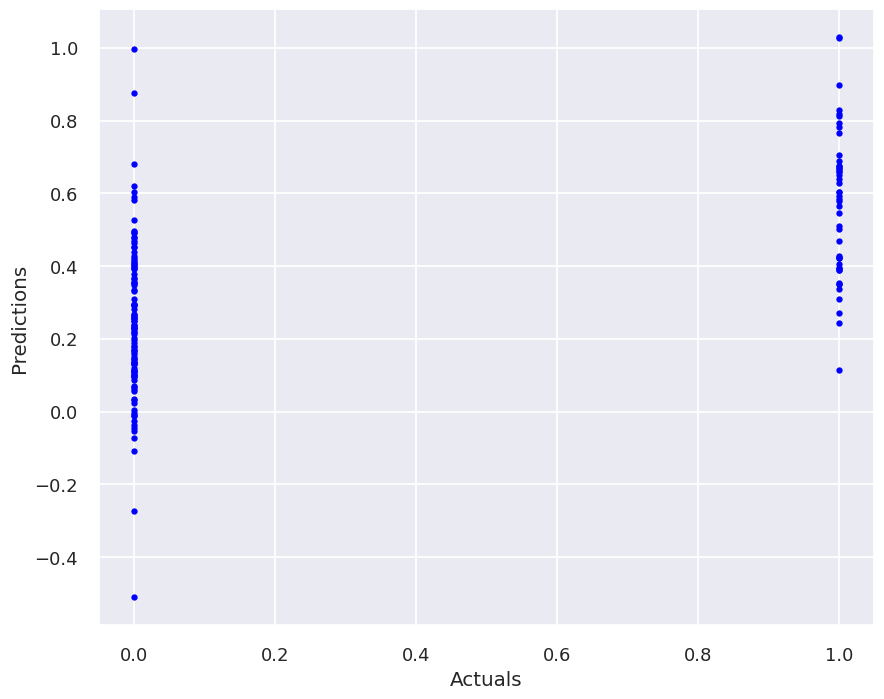

Maximum error:  inf %


REGRESSOR:  ElasticNet Regression 

Coefficients: 
 [ 0.01850596  0.26725735 -0.          0.          0.          0.10291757
  0.          0.02548634]
MSE: 0.16 
MAE: 0.37 
R^2: 0.24


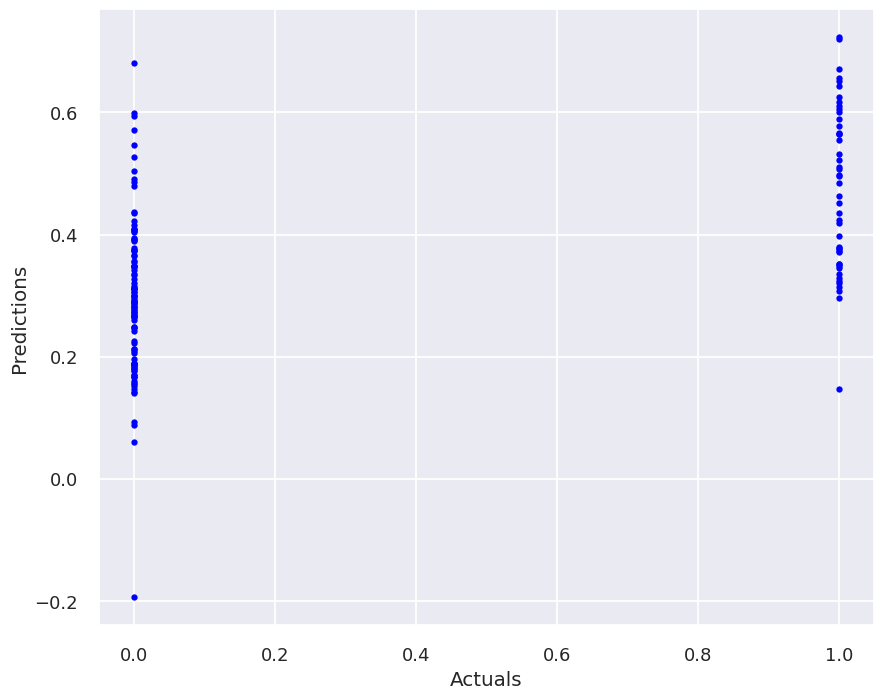

Maximum error:  inf %


REGRESSOR:  kNN 

MSE: 0.17 
MAE: 0.29 
R^2: 0.20


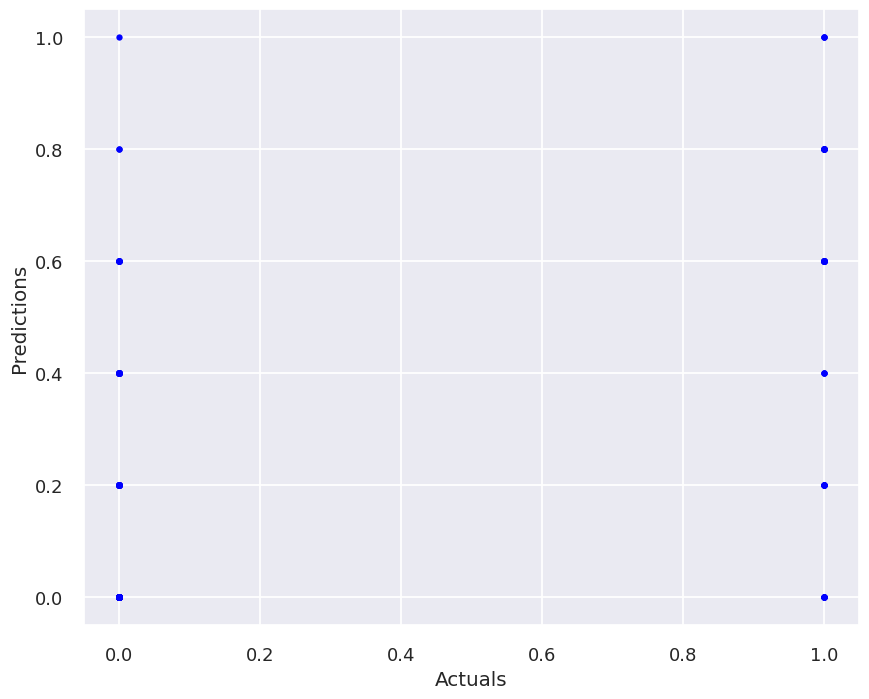

Maximum error:  inf %


REGRESSOR:  SVR 

MSE: 0.20 
MAE: 0.30 
R^2: 0.05


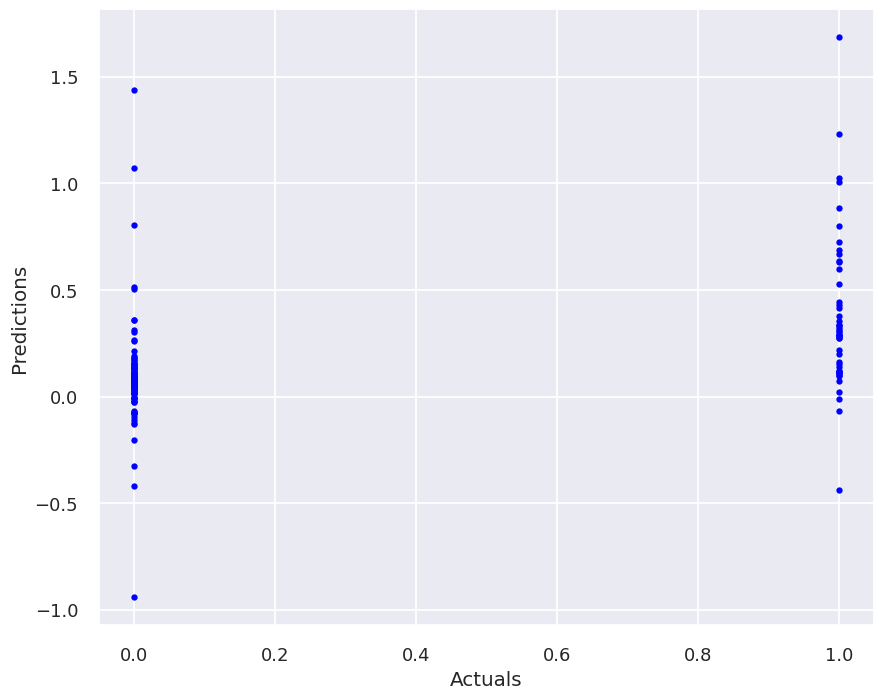

Maximum error:  inf %


REGRESSOR:  Decision Tree 

MSE: 0.23 
MAE: 0.23 
R^2: -0.10


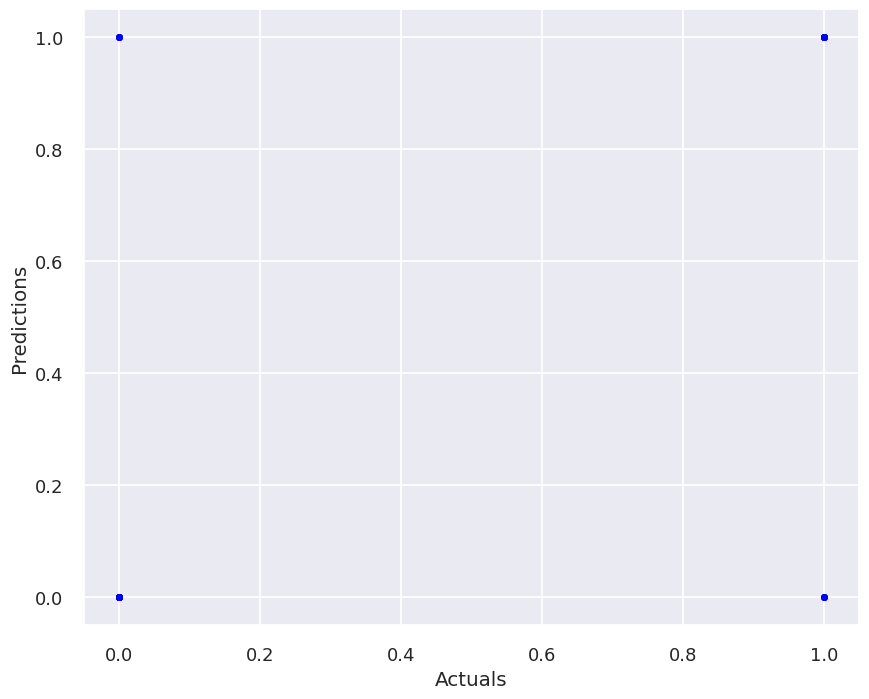

Maximum error:  inf %


REGRESSOR:  Multilayer Perceptron 

MSE: 0.20 
MAE: 0.32 
R^2: 0.04


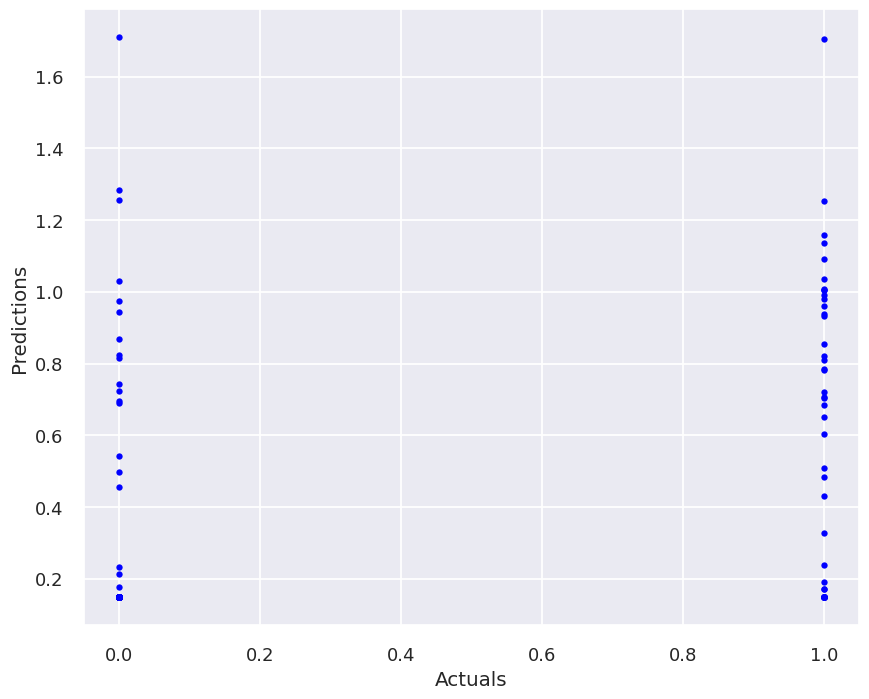

Maximum error:  inf %




In [ ]:
# Loop through base learners
names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVR','Decision Tree','Multilayer Perceptron']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(150,150,1),
                       max_iter = 300,activation = 'relu',         
                       solver = 'adam')] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(X_train_std, np.ravel(y_train_std))
  # Make predictions 
  y_pred_std = regr.predict(X_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  if name in ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression']:
      print('Coefficients: \n', regr.coef_)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

### Ensembles & Deep Learning

In [ ]:
# Stacked Ensemble
# Code in this snippet adapted from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('MLR', linear_model.LinearRegression()))
  level0.append(('Ridge', Ridge(alpha=0.5)))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('XGB', XGBRegressor(objective ='reg:squarederror')))
  # define meta learner model
  level1 = linear_model.LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Multiple Linear Regression'] = linear_model.LinearRegression()
  models['Ridge Regression'] = Ridge(alpha=0.5)
  models['Random Forest'] = RandomForestRegressor()
  models['XGBoost'] = XGBRegressor(objective ='reg:squarederror')
  models['Stacked Ensemble'] = get_stacking()
  return models

In [ ]:
# Keras Deep Learning model definition
def BuildModel():
 model = Sequential()
 model.add(Dense(50, input_dim=7,activation='relu')) 
 model.add(Dense(50, activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

In [ ]:
X_train_std.shape

(614, 8)

REGRESSOR:  Random Forest 

MSE: 0.14 
MAE: 0.28 
R^2: 0.35


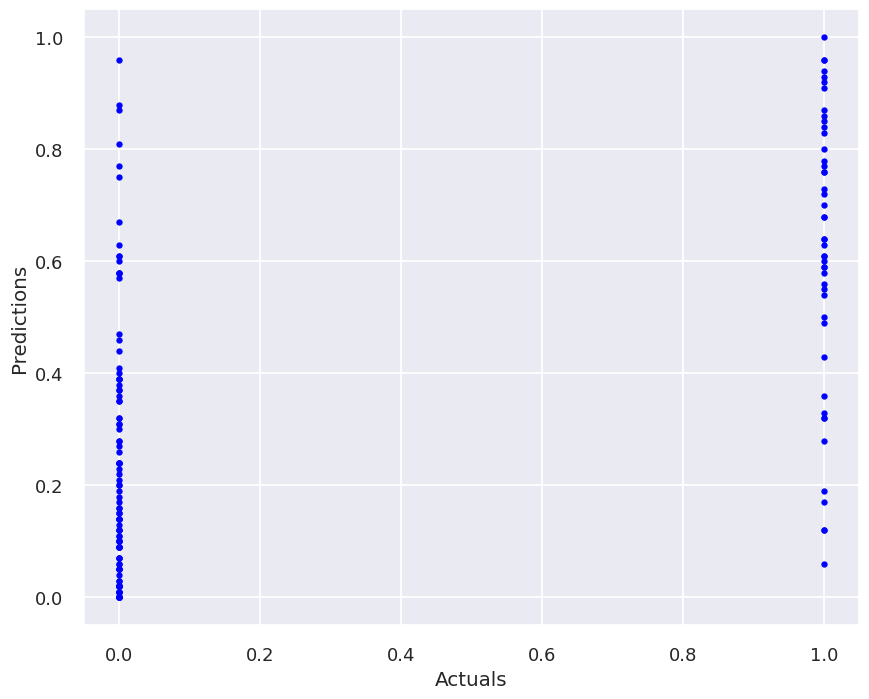

Maximum error:  inf %


REGRESSOR:  XGBoost 

MSE: 0.17 
MAE: 0.30 
R^2: 0.20


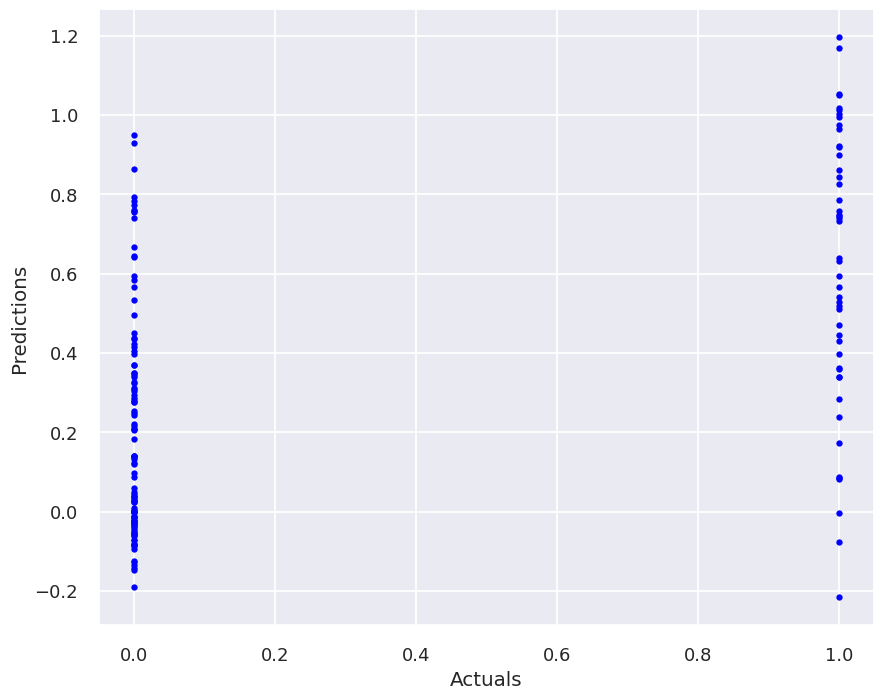

Maximum error:  inf %


REGRESSOR:  AdaBoost 

MSE: 0.17 
MAE: 0.35 
R^2: 0.22


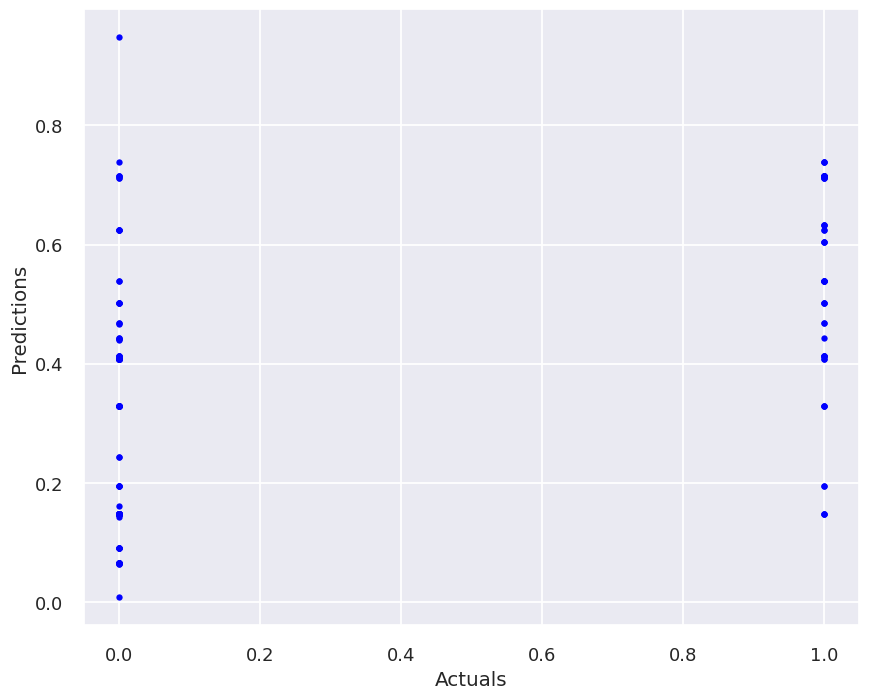

Maximum error:  inf %


REGRESSOR:  Keras Deep Learning 

MSE: 0.14 
MAE: 0.30 
R^2: 0.36


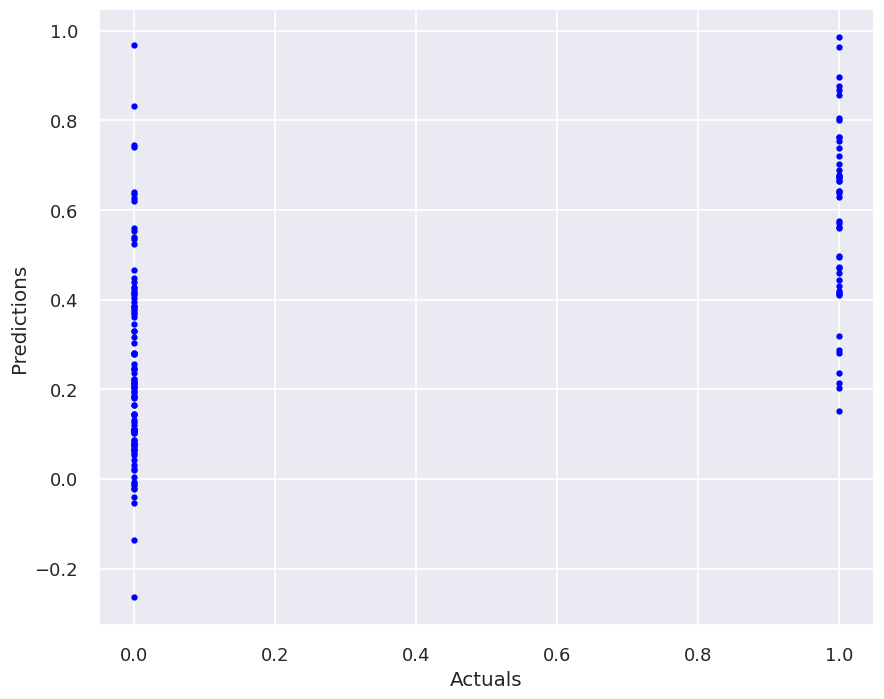

Maximum error:  inf %




In [ ]:
# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Keras Deep Learning','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              get_stacking()   
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(X_train_std, np.ravel(y_train_std))
  # Make predictions 
  y_pred_std = regr.predict(X_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  y_test = pd.DataFrame(y_test)
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-87-2d798117b42f>:57: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ['regressor', KerasRegressor(build_fn=BuildModel,nb_epoch=500,epochs=500, batch_size=20,verbose=0)]])


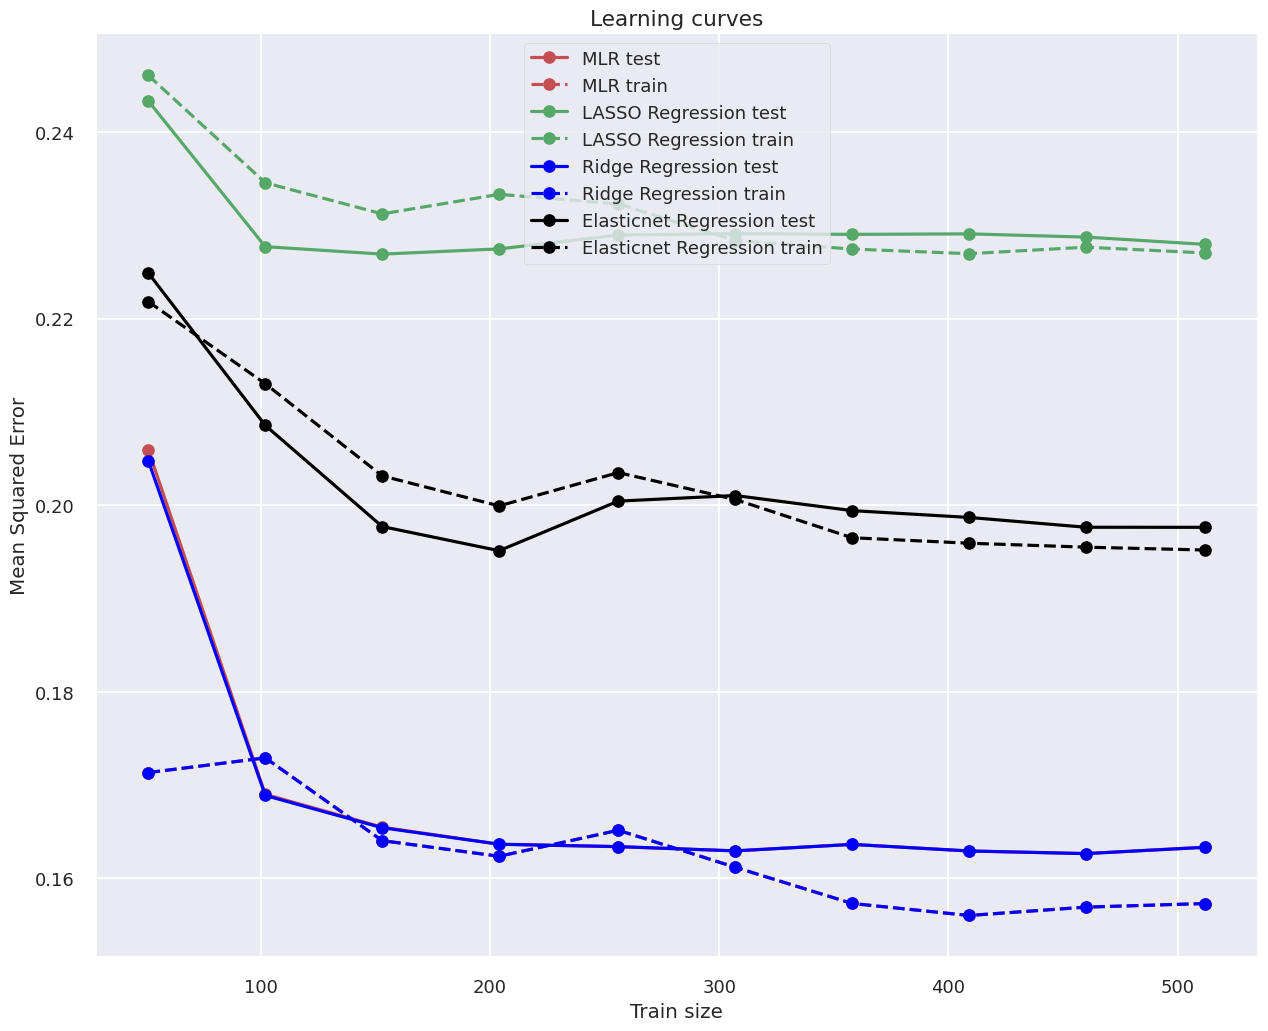

<Figure size 1600x1200 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

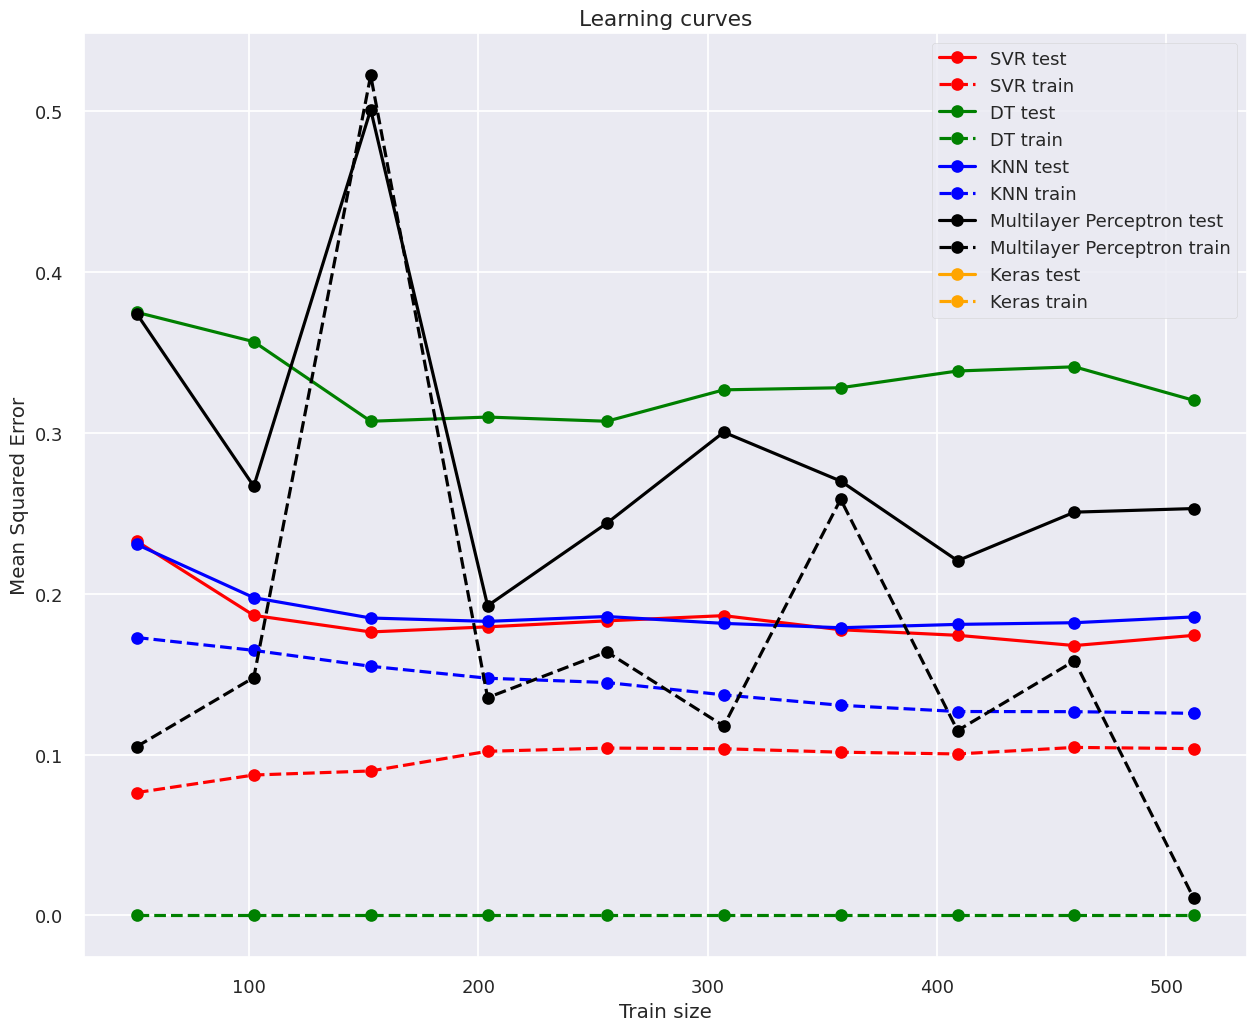

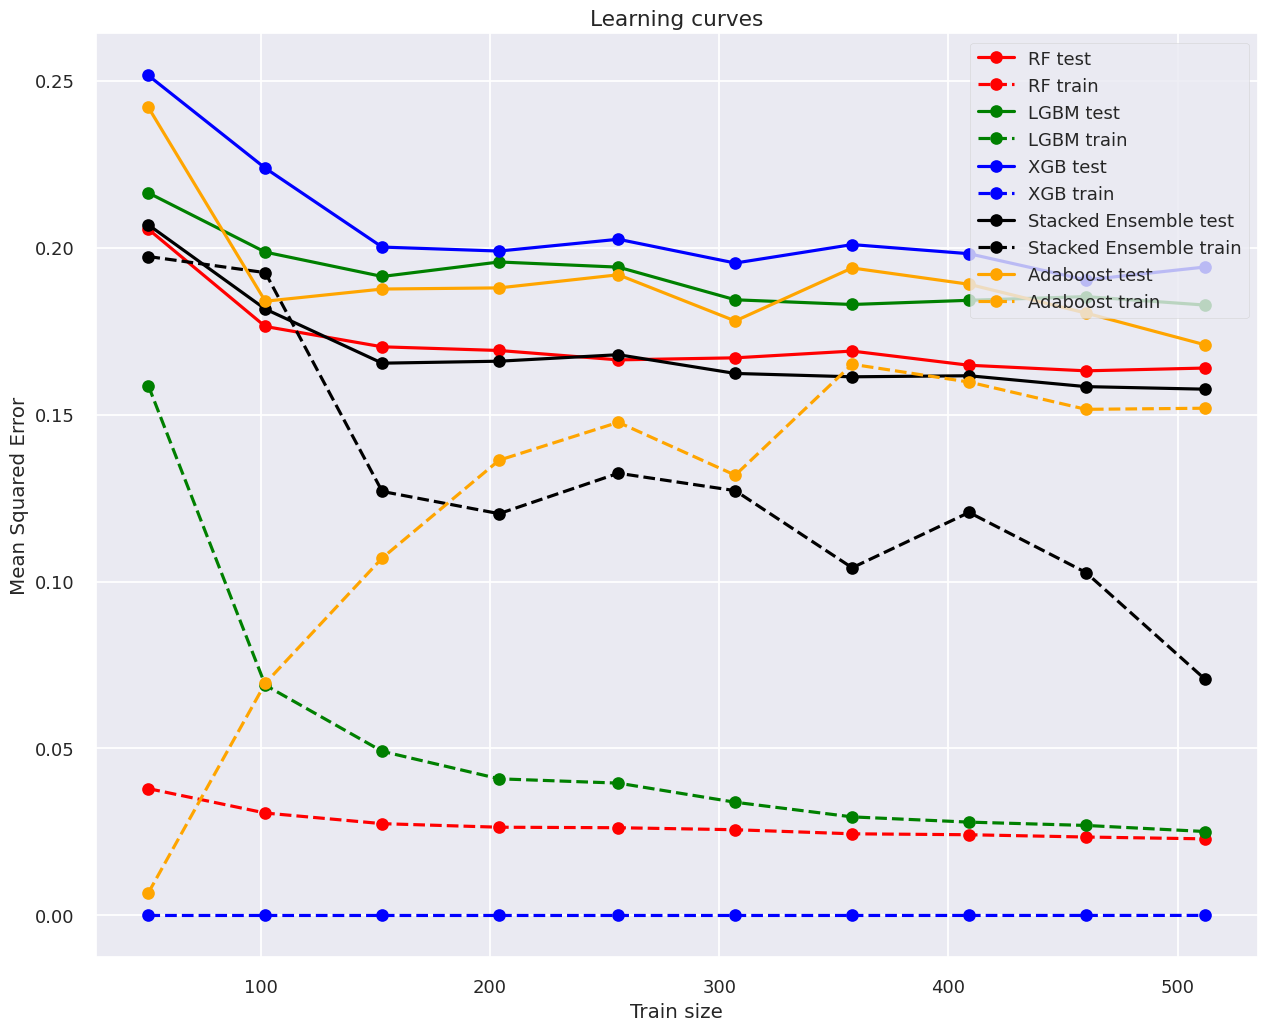

In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import ShuffleSplit
from xgboost import XGBRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

train_size = 0.2 * len(X)

MLR = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', linear_model.LinearRegression()]])

lasso = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor',Lasso(alpha=0.5)]])

ridge = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', Ridge(alpha=0.5)]])

elasticnet = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', ElasticNet(alpha=0.25, l1_ratio=0.5)]])

MLP = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', MLPRegressor(hidden_layer_sizes=(150,150,1), max_iter = 1000,activation = 'relu', solver = 'adam')]])

kNN = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', KNeighborsRegressor(n_neighbors=5)]])

dt = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', DecisionTreeRegressor()]])

svr = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', SVR()]])

XGB = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', XGBRegressor(objective ='reg:squarederror')]])

RF = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', RandomForestRegressor()]])

LGBM = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', LGBMRegressor()]])

adaboost = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor',AdaBoostRegressor()]])

keras = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', KerasRegressor(build_fn=BuildModel,nb_epoch=500,epochs=500, batch_size=20,verbose=0)]])

stacked_ensemble = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', get_stacking()]])   


# Visualize learning curves

plt.rcParams["figure.figsize"] = (15,12)
plt.figure()

train_sizes, train_scores_MLR, test_scores_MLR = learning_curve(
    MLR,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_lasso, test_scores_lasso = learning_curve(
    lasso,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_ridge, test_scores_ridge = learning_curve(
    ridge,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_elasticnet, test_scores_elasticnet = learning_curve(
    elasticnet,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)

plt.plot(train_sizes, -test_scores_MLR.mean(1), "o-", color="r", label="MLR test")
plt.plot(train_sizes, -train_scores_MLR.mean(1), "o--", color="r", label="MLR train")
plt.plot(train_sizes, -test_scores_lasso.mean(1), "o-", color="g", label="LASSO Regression test")
plt.plot(train_sizes, -train_scores_lasso.mean(1), "o--", color="g", label="LASSO Regression train")
plt.plot(train_sizes, -test_scores_ridge.mean(1), "o-", color="blue", label="Ridge Regression test")
plt.plot(train_sizes, -train_scores_ridge.mean(1), "o--", color="blue", label="Ridge Regression train")
plt.plot(train_sizes, -test_scores_elasticnet.mean(1), "o-", color="black", label="Elasticnet Regression test")
plt.plot(train_sizes, -train_scores_elasticnet.mean(1), "o--", color="black", label="Elasticnet Regression train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")
figure(figsize=(20, 15), dpi=80)
plt.show()

train_sizes, train_scores_svr, test_scores_svr = learning_curve(
    svr,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_dt, test_scores_dt = learning_curve(
    dt,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_kNN, test_scores_kNN = learning_curve(
    kNN,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_MLP, test_scores_MLP = learning_curve(
    MLP,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_keras, test_scores_keras = learning_curve(
    keras,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
plt.plot(train_sizes, -test_scores_svr.mean(1), "o-", color="red", label="SVR test")
plt.plot(train_sizes, -train_scores_svr.mean(1), "o--", color="red", label="SVR train")
plt.plot(train_sizes, -test_scores_dt.mean(1), "o-", color="green", label="DT test")
plt.plot(train_sizes, -train_scores_dt.mean(1), "o--", color="green", label="DT train")
plt.plot(train_sizes, -test_scores_kNN.mean(1), "o-", color="blue", label="KNN test")
plt.plot(train_sizes, -train_scores_kNN.mean(1), "o--", color="blue", label="KNN train")
plt.plot(train_sizes, -test_scores_MLP.mean(1), "o-", color="black", label="Multilayer Perceptron test")
plt.plot(train_sizes, -train_scores_MLP.mean(1), "o--", color="black", label="Multilayer Perceptron train")
plt.plot(train_sizes, -test_scores_keras.mean(1), "o-", color="orange", label="Keras test")
plt.plot(train_sizes, -train_scores_keras.mean(1), "o--", color="orange", label="Keras train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()


train_sizes, train_scores_RF, test_scores_RF = learning_curve(
    RF,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_XGB, test_scores_XGB = learning_curve(
    XGB,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_LGBM, test_scores_LGBM = learning_curve(
    LGBM,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_adaboost, test_scores_adaboost = learning_curve(
    adaboost,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_stacked_ensemble, test_scores_stacked_ensemble = learning_curve(
    stacked_ensemble,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
plt.plot(train_sizes, -test_scores_RF.mean(1), "o-", color="red", label="RF test")
plt.plot(train_sizes, -train_scores_RF.mean(1), "o--", color="red", label="RF train")
plt.plot(train_sizes, -test_scores_LGBM.mean(1), "o-", color="green", label="LGBM test")
plt.plot(train_sizes, -train_scores_LGBM.mean(1), "o--", color="green", label="LGBM train")
plt.plot(train_sizes, -test_scores_XGB.mean(1), "o-", color="blue", label="XGB test")
plt.plot(train_sizes, -train_scores_XGB.mean(1), "o--", color="blue", label="XGB train")
plt.plot(train_sizes, -test_scores_stacked_ensemble.mean(1), "o-", color="black", label="Stacked Ensemble test")
plt.plot(train_sizes, -train_scores_stacked_ensemble.mean(1), "o--", color="black", label="Stacked Ensemble train")
plt.plot(train_sizes, -test_scores_adaboost.mean(1), "o-", color="orange", label="Adaboost test")
plt.plot(train_sizes, -train_scores_adaboost.mean(1), "o--", color="orange", label="Adaboost train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()